# Data Exploration

In this notebook describe your data exploration steps.

## Preperation / Setup

### Install dependencies

In [32]:
%pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


### Load data and import dependencies

In [52]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

bikes = pd.read_sql_table('bikes', 'sqlite:///../data/data.sqlite')
weather = pd.read_sql_table('weather', 'sqlite:///../data/data.sqlite')

## Data

### Look at the first rows

Radaktivität kann von verschiedensten Faktoren abhängen. Deswegen erstmal Übersicht über die Daten bekommen.

In [73]:
# byDate = bikes.groupby(bikes['id'].str[:10]).agg({ 'count': 'sum' })
# byDate['id'] = byDate['id'].apply(lambda x: x[5:])
# byDate.head(10)
# byDate.iloc[:len(byDate)//2].plot()

byDate20 = {}
byDate21 = {}
byHour = {}
byWeekday = {}
byMonth = {}

for idx, row in bikes.iterrows():
    count = row['count']
    date, hour = row['id'].split(' ')
    year, month, day = date.split('-')

    date_without_year = month + '-' + day
    if not date_without_year in byDate20:
        byDate20[date_without_year] = 0
    if not date_without_year in byDate21:
        byDate21[date_without_year] = 0
    if year == '2020':
        byDate20[date_without_year] += count
    else:
        byDate21[date_without_year] += count

    if not hour in byHour:
        byHour[hour] = 0
    byHour[hour] += count

    weekday = str(datetime.date(int(year), int(month), int(day)).weekday())
    if not weekday in byWeekday:
        byWeekday[weekday] = 0
    byWeekday[weekday] += count

    if not month in byMonth:
        byMonth[month] = 0
    byMonth[month] += count

Als erstes über das Datum betrachtet:

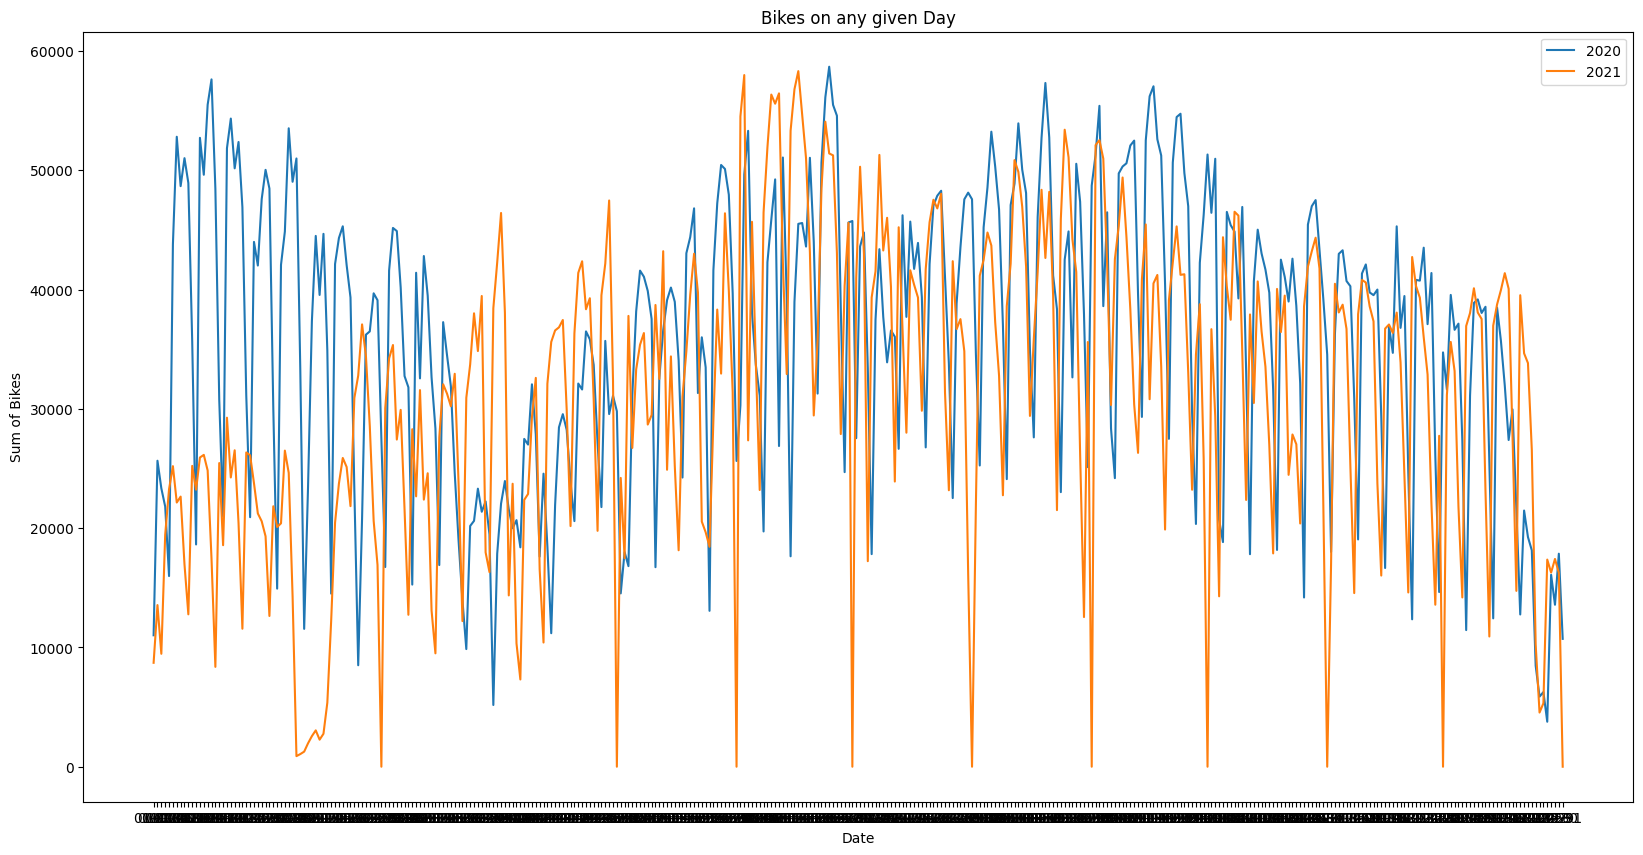

In [97]:
plt.figure(figsize=(20, 10))
plt.plot(byDate20.keys(), byDate20.values(), label="2020")
plt.plot(byDate21.keys(), byDate21.values(), label="2021")
plt.xlabel("Date")
plt.ylabel("Sum of Bikes")
plt.title("Bikes on any given Day")
plt.legend()
plt.show()

Nicht sonderlich aussagekräftig. Schauen wir deswegen erst einmal jeden Monat einzeln an:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


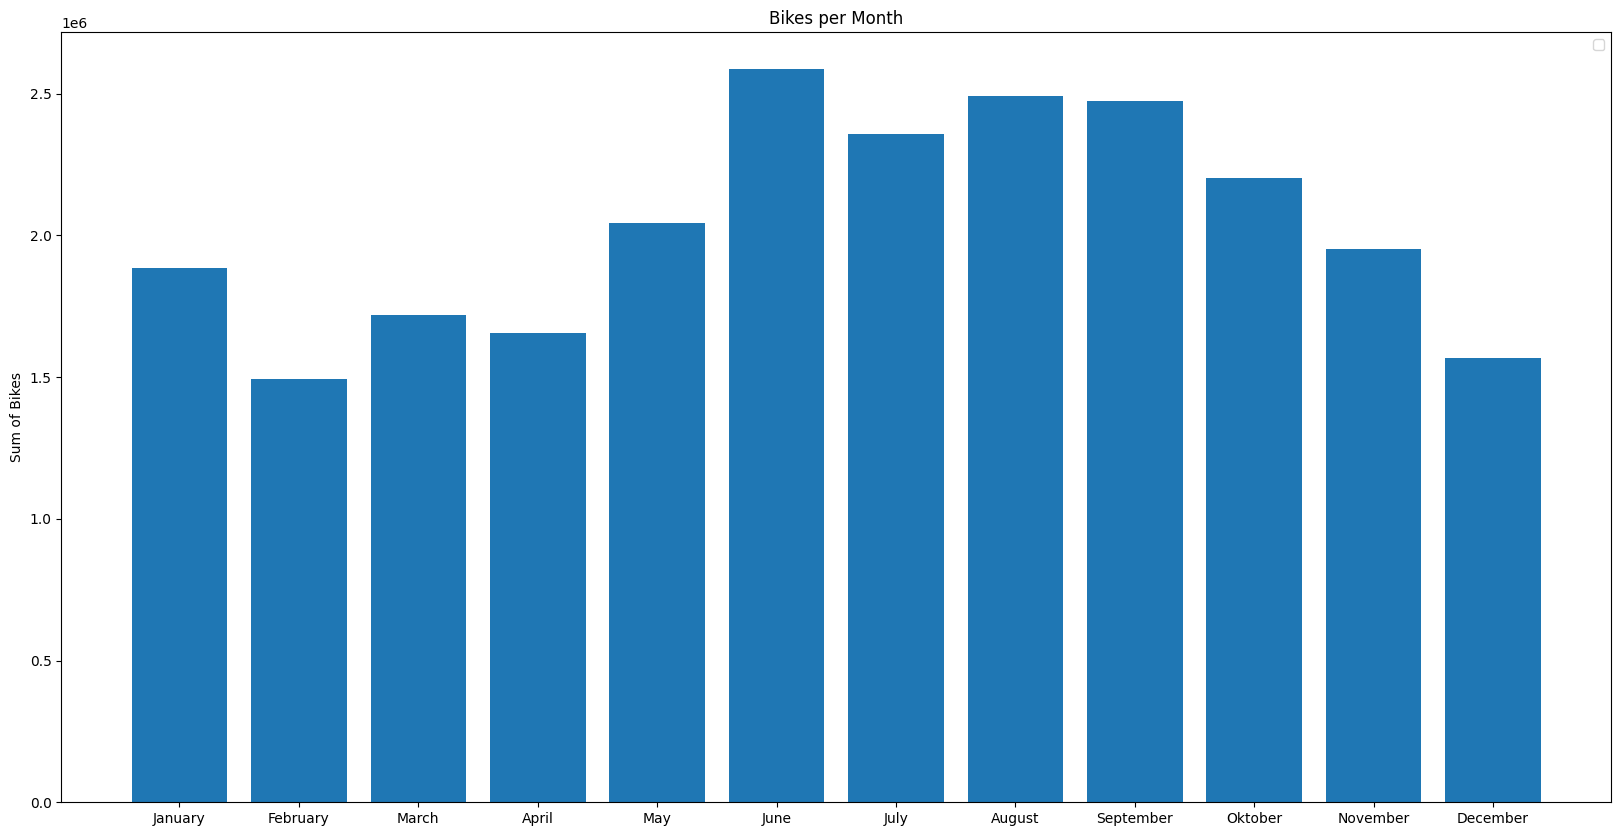

In [95]:
month_names = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Oktober', 'November', 'December' ]

plt.figure(figsize=(20, 10))
plt.bar([month_names[int(x)-1] for x in list(byMonth.keys())], byMonth.values())
plt.ylabel("Sum of Bikes")
plt.title("Bikes per Month")
plt.legend()
plt.show()

That's more informative. More bikers during Summer, less bikers during winter. Makes sense.
Let's see it by Weekday

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


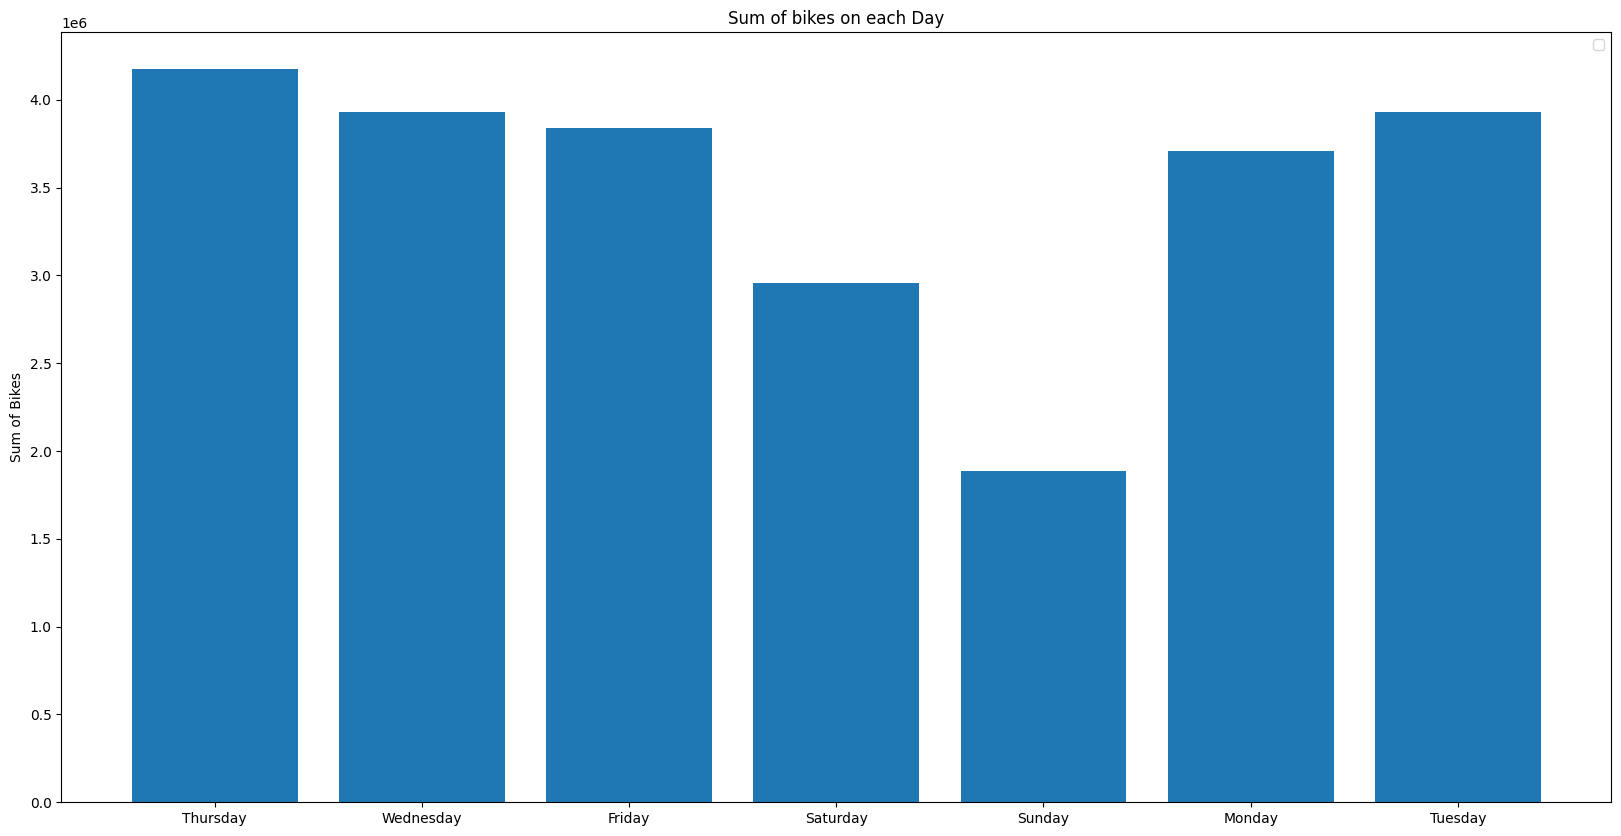

In [94]:
day_names = [ 'Monday', 'Tuesday', 'Thursday', 'Wednesday', 'Friday', 'Saturday', 'Sunday' ]

plt.figure(figsize=(20, 10))
plt.bar([day_names[int(x)] for x in list(byWeekday.keys())], byWeekday.values())
plt.ylabel("Sum of Bikes")
plt.title("Sum of bikes on each Day")
plt.legend()
plt.show()

Interestingly the weekend is less then half as busy as workdays. Apparently a lot of people use their bikes more as a means to get to places like work or shopping, rather than a freetime activity or sport to do in their free time.

Lastly let's see which hours are the busiest:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


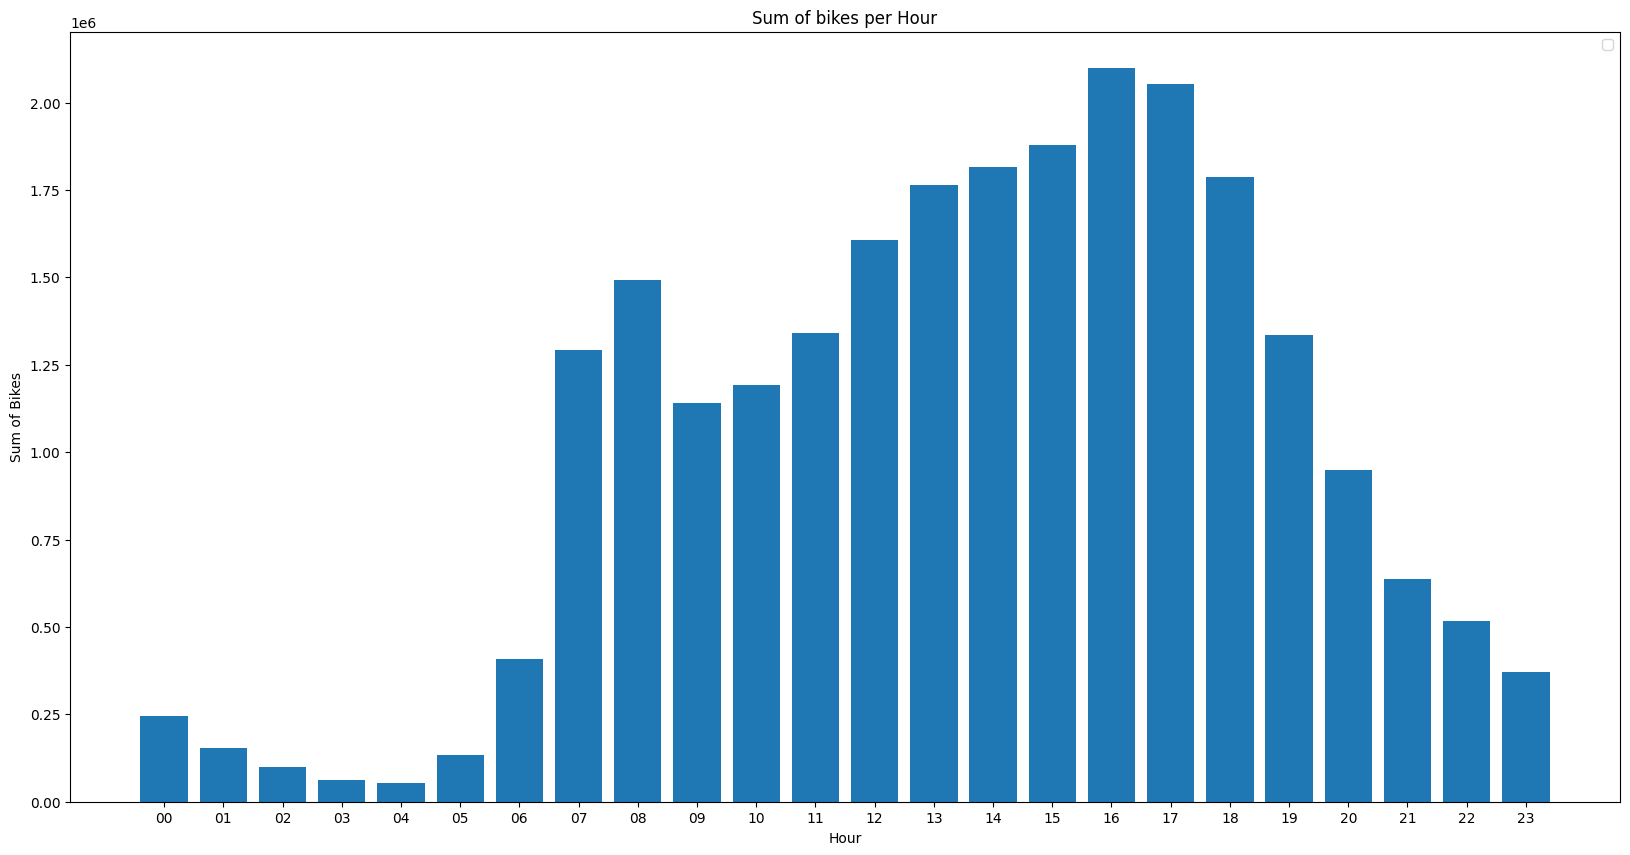

In [100]:
plt.figure(figsize=(20, 10))
plt.bar(byHour.keys(), byHour.values())
plt.xlabel("Hour")
plt.ylabel("Sum of Bikes")
plt.title("Sum of bikes per Hour")
plt.legend()
plt.show()

As would be expected, traffic at night is a lot lower than during daytime. Additionally it is apparent that between 7:00 and 8:00 in the morning and around 16:00 to 18:00 in the evening are peak times. This would corrolate with our theory from earlier that stated a lot of people use their bike to get from and to work as those times line up with usual office hours.